# These are the questions that we will address throughout the project.
- Average of sales for every Region.
- Average of sales for every Product.
- What is the Top product with total sales?
- Count of each Product.
- Mean of sales.
- Which sales method is used most, and for every region?
- What about sales over years?
- Which retailer is the most?
- Which products have the highest operating profit margin?

## Import libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [11]:
data = pd.read_csv("Adidas sales data for 2020 and 2021.csv")

### Data Decovering

In [13]:
# View first 10 rows 
data.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","50,000","$12,500",In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","62,500","$31,250",In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"45,000","$13,500",Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"38,000","$13,300",Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"37,125","$12,994",Outlet


In [14]:
data.shape

(9648, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


#### Notes: 
- We need to convert the datatypes for Price per Unit, Units Sold, Total Sales, and Operating Profit from **object** to **int**,
and invoice date need to convert from **object** to **datetime**.
- we have 7 loss values in Region column, and 2 values in Product column.

### Data Cleaning

#### Changing the datatypes

In [19]:
# Price per Unit
data['Price per Unit'] = data['Price per Unit'].str.replace("$","")
data['Price per Unit'] = data['Price per Unit'].astype('float')

In [20]:
# Unit sold 
data['Units Sold'] = data['Units Sold'].str.replace(",","")
data['Units Sold'] = data['Units Sold'].astype('int')

In [21]:
# Total Sales
data['Total Sales'] =data['Total Sales'].str.replace("$","").str.replace(",","")
data['Total Sales'] = data['Total Sales'].astype('float')

In [22]:
# Operating Profit
data['Operating Profit'] =data['Operating Profit'].str.replace("$","").str.replace(",","")
data['Operating Profit'] = data['Operating Profit'].astype('float')

In [23]:
# Invoice date
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

In [24]:
# Check again for the datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9641 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9646 non-null   float64       
 8   Units Sold        9648 non-null   int32         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 866.9+ KB


In [25]:
# Extract the month and year from the invoice date to make it easier to work with than using the full date.
data['month'] = data['Invoice Date'].dt.month
data['year'] = data['Invoice Date'].dt.year

In [26]:
# fill the missing values for the Region based on the State for another row 
data['Region'] = data.groupby('State')['Region'].transform(lambda x: x.ffill().bfill())

In [27]:
# Fill in the missing values for Price per unit by calculating the average of all units and using that result for these 2 values.
data['Price per Unit'] = data['Price per Unit'].fillna(value=data['Price per Unit'].mean())

In [28]:
# Check again for the null values 
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
month               0
year                0
dtype: int64

### Answering the questions

In [30]:
# the average invoice for each region
data.groupby("Region")['Total Sales'].mean()

Region
Midwest       7254.310897
Northeast     7841.955808
South         8371.736690
Southeast    13331.001634
West         11027.115196
Name: Total Sales, dtype: float64

In [31]:
# the average invoice for each product is sorted from the high total sales to the low
data.groupby("Product")["Total Sales"].mean().sort_values(ascending=False)

Product
Men's aparel                 54000.000000
Men's Street Footwear        12970.601863
Women's Apparel              11134.272388
Men's Athletic Footwear       9544.975155
Women's Street Footwear       7960.393657
Men's Apparel                 7675.330218
Women's Athletic Footwear     6639.623288
Name: Total Sales, dtype: float64

In [32]:
data["Product"].count()

9648

In [33]:
data["Product"].nunique()

7

So, this means we have only 7 unique products sold across 9,648 invoices.

In [35]:
# The average total sales per invoice.
data["Total Sales"].mean()

9327.367537313432

In [36]:
Region_Sales_method = data.groupby(['Region', 'Sales Method'])['Sales Method'].count().reset_index(name='Count')
Region_Sales_method = Region_Sales_method.sort_values(by='Count', ascending=False)
Region_Sales_method

,Region,Sales Method,Count
1,Midwest,Online,1165
13,West,Online,1152
4,Northeast,Online,936
14,West,Outlet,898
8,South,Outlet,864
7,South,Online,844
10,Southeast,Online,792
5,Northeast,Outlet,757
3,Northeast,In-store,683
0,Midwest,In-store,445


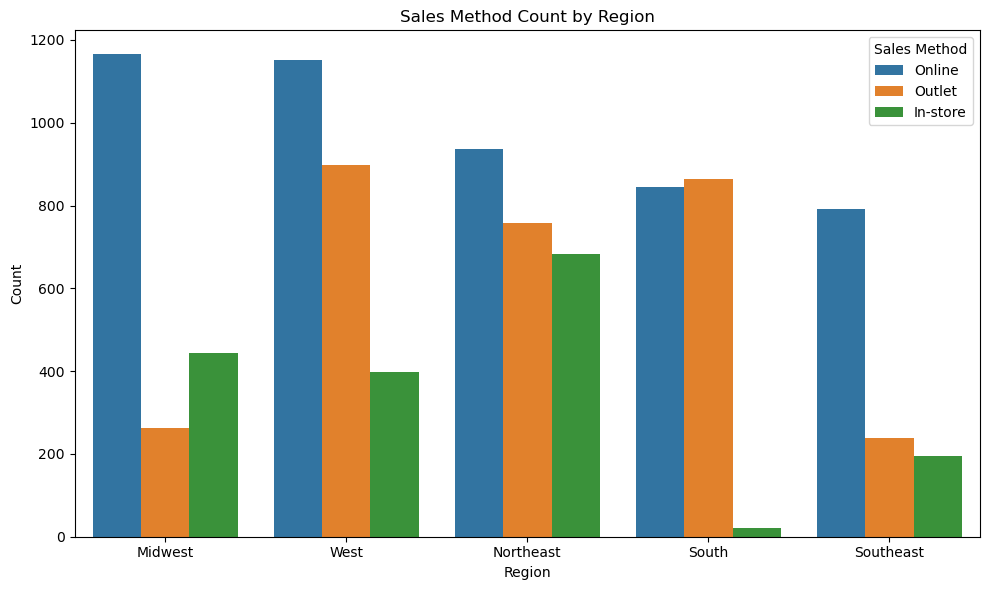

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', hue='Sales Method', data=Region_Sales_method)
plt.title('Sales Method Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()

In [38]:
count_data = data.groupby(['Region', 'Sales Method'])['Sales Method'].count().reset_index(name='Count')
sorted_data = count_data.sort_values(['Region', 'Count'], ascending=[True, False])
sorted_data

,Region,Sales Method,Count
1,Midwest,Online,1165
0,Midwest,In-store,445
2,Midwest,Outlet,262
4,Northeast,Online,936
5,Northeast,Outlet,757
3,Northeast,In-store,683
8,South,Outlet,864
7,South,Online,844
6,South,In-store,20
10,Southeast,Online,792


The top sales method in all regions is online, except for the South, where it's outlet.

In [40]:
Sales_2020 = data[data['year'] == 2020]['Total Sales'].sum()
Sales_2021 = data[data['year'] == 2021]['Total Sales'].sum()
print('Total Sales in 2020 is ', Sales_2020 , ' and the total sales for 2021 is ' , Sales_2021) 

Total Sales in 2020 is  18208100.0  and the total sales for 2021 is  71782342.0


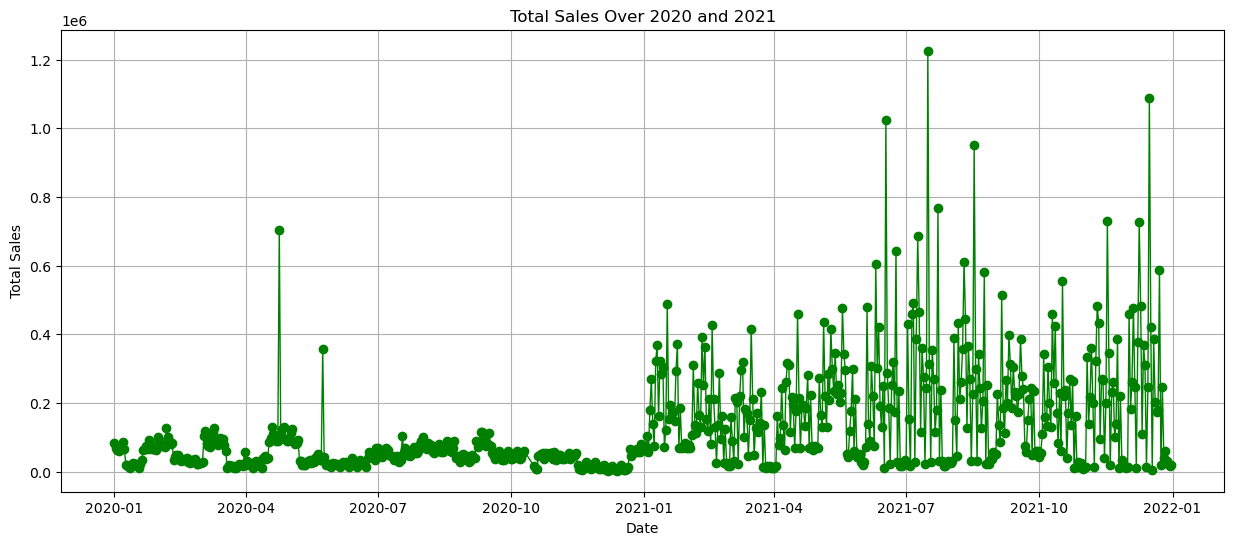

In [41]:
daily_sales = data.groupby('Invoice Date')['Total Sales'].sum()
plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='g', linestyle='-', linewidth=1)
plt.title('Total Sales Over 2020 and 2021')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

It is clear that sales have increased significantly since 2021 compared to 2020, and it is also clear that there are many events that cause sales to suddenly rise and then drop again. However, sales are generally increasing over time.

In [43]:
Top_retailers = data.groupby('Retailer')['Total Sales'].sum().sort_values()

In [44]:
Top_retailers

Retailer
Walmart           7455850.0
Amazon            7769912.0
Kohl's           10211506.0
Sports Direct    18247156.0
Foot Locker      22009528.0
West Gear        24296490.0
Name: Total Sales, dtype: float64

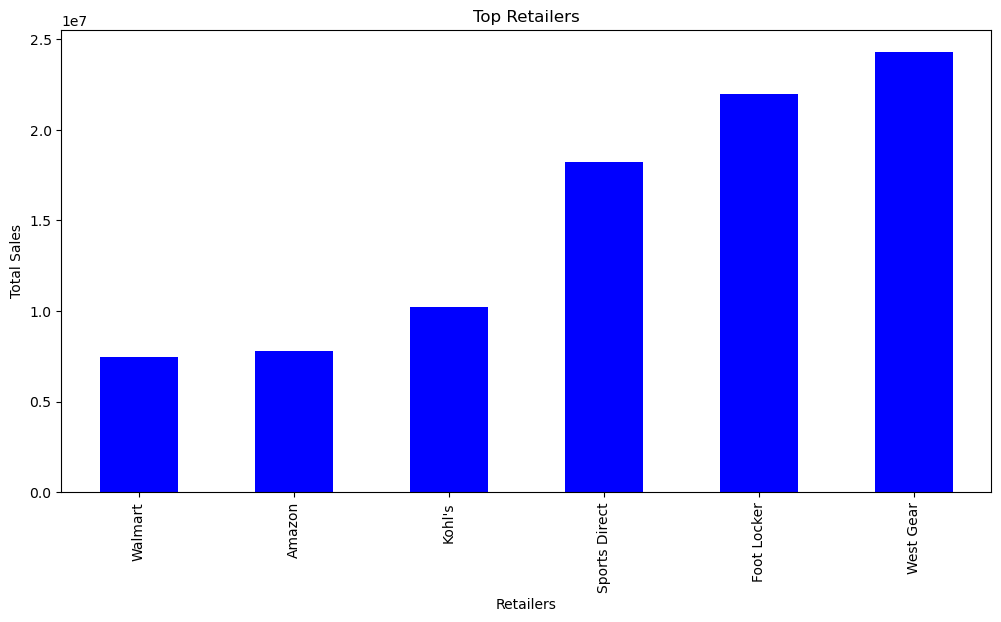

In [45]:
plt.figure(figsize=(12, 6))
Top_retailers.plot(kind='bar', x='Category', y='Value', title='Top Retailers' , color = 'b')
plt.xlabel('Retailers')
plt.ylabel('Total Sales')
plt.show()

In [99]:
# Calculate the margin percentage for every product 
data['Operating Profit Margin'] = (data['Operating Profit'] / data['Total Sales']) * 100
product_profit_margin = data.groupby('Product')['Operating Profit Margin'].mean().sort_values(ascending=False)
product_profit_margin

Product
Men's Street Footwear        44.612191
Women's Apparel              44.129909
Women's Athletic Footwear    42.422217
Men's Apparel                41.323792
Women's Street Footwear      41.021210
Men's Athletic Footwear      40.268408
Men's aparel                 30.000000
Name: Operating Profit Margin, dtype: float64

In [102]:
data.groupby('Retailer')['Operating Profit Margin'].mean().sort_values(ascending=False)

Retailer
Sports Direct    44.487502
Kohl's           41.924145
Amazon           41.787010
Foot Locker      41.784171
West Gear        41.783089
Walmart          40.652906
Name: Operating Profit Margin, dtype: float64